## Creator Info

#### John Paul M. Curada
Facebook: https://www.facebook.com/jp.curada.3/

Email: johncurada.02@gmail.com

LinkedIn: https://www.linkedin.com/in/jpcurada/

# Import Dependencies


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl

import seaborn as sns
sns.set_theme()

# Loading the Data

Dataset link: https://www.kaggle.com/datasets/sunayanagawde/mobiles-dataset-from-flipkart

In [2]:
df = pd.read_csv('flipkart_mobiles.csv')

In [3]:
df.head(20)

,Name,Brand,Ratings,No_of_ratings,No_of_reviews,Product_features,MSP,MRP,Discount
0,"realme 9i (Prism Blue, 64 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
1,"realme 9i (Prism Black, 64 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
2,"realme 9i (Prism Blue, 128 GB)",realme,4.5,25380,1517,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,13499,17999,25
3,"realme 9i (Prism Black, 128 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35
4,"realme 9i (Prism Blue, 128 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35
5,"POCO C31 (Shadow Gray, 64 GB)",POCO,4.3,"1,78,186",11037,['4 GB RAM | 64 GB ROM | Expandable Upto 512 G...,7499,11999,37
6,"REDMI 9i Sport (Metallic Blue, 64 GB)",REDMI,4.3,"2,01,192",11760,['4 GB RAM | 64 GB ROM | Expandable Upto 512 G...,7099,9999,29
7,"REDMI 9i Sport (Coral Green, 64 GB)",REDMI,4.3,"2,01,192",11760,['4 GB RAM | 64 GB ROM | Expandable Upto 512 G...,7099,9999,29
8,"APPLE iPhone 13 (Midnight, 128 GB)",APPLE,4.7,"1,74,464",9613,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",61999,69900,11
9,"MOTOROLA e40 (Carbon Gray, 64 GB)",MOTOROLA,4.1,52643,5307,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,7999,10999,27


In [4]:
df.columns

Index(['Name', 'Brand', 'Ratings', 'No_of_ratings', 'No_of_reviews',
       'Product_features', 'MSP', 'MRP', 'Discount'],
      dtype='object')

In [5]:
df['Brand'].value_counts()

realme        111
REDMI          62
Infinix        60
SAMSUNG        56
POCO           51
APPLE          49
MOTOROLA       43
vivo           39
OPPO           27
Kechaoda       17
Micromax       14
Redmi          13
itel           13
Nokia          12
Tecno          10
LAVA           10
IQOO            8
Nothing         5
MTR             4
Xiaomi          3
Realme          3
BlackZone       3
Moto            2
KARBONN         1
Lvix            1
Google          1
DIZO            1
I               1
GREENBERRI      1
ANGAGE          1
Name: Brand, dtype: int64

# Data Cleaning

In [6]:
# Capitalize all the names of the brand
df['Brand'] = df['Brand'].str.upper()

In [7]:
# Capitalize the unit/model name and remove the parenthesis part
df['Name'] = df['Name'].str.upper()

def remove_parenthesis(val):
    if '(' in val:
        val = val.split('(')[0]
    return val

df['Name'] = df['Name'].apply(remove_parenthesis)

In [8]:
# Remove comma in the No_of_ratings, MSP, MRP values and convert it to int64

def remove_comma(val):
    if ',' in val:
        val = val.replace(',', '')
    return val

df['No_of_ratings'] = df['No_of_ratings'].apply(remove_comma)
df['No_of_ratings'] = df['No_of_ratings'].astype('int64') 

df['MSP'] = df['MSP'].apply(remove_comma)
df['MSP'] = df['MSP'].astype('int64') 

df['MRP'] = df['MRP'].apply(remove_comma)
df['MRP'] = df['MRP'].astype('int64') 

In [9]:
# define regular expressions to extract the relevant information from each string
ram_regex = r'(\d+\.?\d*)\s+(GB|MB)\s+RAM'
rom_regex = r'(\d+\.?\d*)\s+(GB|MB)\s+ROM'
expandable_regex = r'Expandable\s+Upto\s+(\d+\.?\d*)\s+(TB|GB)'
display_regex = r'(\d+\.?\d*)\s+cm\s+\(.*\)\s+.*\s+(Display|Screen)'
rear_camera_regex = r'(\d+\.?\d*)MP\s+Rear\s+Camera'
front_camera_regex = r'(\d+\.?\d*)MP\s+Front\s+Camera'
battery_regex = r'(\d+\.?\d*)\s+mAh\s+.*\s+Battery'
warranty_regex = r'(\d+)\s+Year\s+Manufacturer\s+Warranty\s+for\s+Phone.*In-Box\s+Accessories'

# apply the regular expressions to each string in the column and create separate columns for each specification
df['RAM'] = df['Product_features'].str.extract(ram_regex, expand=False)[0]
df['ROM'] = df['Product_features'].str.extract(rom_regex, expand=False)[0]
df['Expandable'] = df['Product_features'].str.contains(expandable_regex, regex=True).astype(int)
df['Display'] = df['Product_features'].str.extract(display_regex, expand=False)[0]
df['Rear Camera'] = df['Product_features'].str.extract(rear_camera_regex, expand=False)
df['Front Camera'] = df['Product_features'].str.extract(front_camera_regex, expand=False)
df['Battery'] = df['Product_features'].str.extract(battery_regex, expand=False)
df['Warranty'] = df['Product_features'].str.contains(warranty_regex, regex=True).astype(int)

# convert RAM and ROM columns to numeric data type
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')
df['ROM'] = pd.to_numeric(df['ROM'], errors='coerce')

# replace NaN values with 0 in RAM and ROM columns
df[['RAM', 'ROM']] = df[['RAM', 'ROM']].fillna(value=0)
df[['RAM', 'ROM']] = df[['RAM', 'ROM']].astype('int64') 


C:\Users\JOHN PAUL\AppData\Local\Temp\ipykernel_2912\2045942269.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['Expandable'] = df['Product_features'].str.contains(expandable_regex, regex=True).astype(int)
C:\Users\JOHN PAUL\AppData\Local\Temp\ipykernel_2912\2045942269.py:19: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['Warranty'] = df['Product_features'].str.contains(warranty_regex, regex=True).astype(int)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              622 non-null    object 
 1   Brand             622 non-null    object 
 2   Ratings           622 non-null    float64
 3   No_of_ratings     622 non-null    int64  
 4   No_of_reviews     622 non-null    int64  
 5   Product_features  622 non-null    object 
 6   MSP               622 non-null    int64  
 7   MRP               622 non-null    int64  
 8   Discount          622 non-null    int64  
 9   RAM               622 non-null    int64  
 10  ROM               622 non-null    int64  
 11  Expandable        622 non-null    int32  
 12  Display           519 non-null    object 
 13  Rear Camera       147 non-null    object 
 14  Front Camera      509 non-null    object 
 15  Battery           379 non-null    object 
 16  Warranty          622 non-null    int32  
dt

In [11]:
df

,Name,Brand,Ratings,No_of_ratings,No_of_reviews,Product_features,MSP,MRP,Discount,RAM,ROM,Expandable,Display,Rear Camera,Front Camera,Battery,Warranty
0,REALME 9I,REALME,4.5,111865,6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31,4,64,1,16.76,NaN,16,5000,0
1,REALME 9I,REALME,4.5,111865,6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31,4,64,1,16.76,NaN,16,5000,0
2,REALME 9I,REALME,4.5,25380,1517,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,13499,17999,25,6,128,1,16.76,NaN,16,5000,0
3,REALME 9I,REALME,4.5,111865,6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35,4,128,1,16.76,NaN,16,5000,0
4,REALME 9I,REALME,4.5,111865,6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35,4,128,1,16.76,NaN,16,5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,MOTOROLA E32,MOTOROLA,4.2,123,16,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,9499,11999,20,4,64,1,16.51,NaN,8,NaN,0
618,REDMI NOTE 9,REDMI,4.3,123381,9426,['4 GB RAM | 128 GB ROM | Expandable Upto 512 ...,13499,16499,18,4,128,1,16.59,NaN,13,NaN,0
619,SAMSUNG GALAXY A13,SAMSUNG,4.1,247,19,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,16999,20990,19,6,128,1,16.76,NaN,8,5000,0
620,REDMI NOTE 11 PRO,REDMI,4.1,611,43,"['8 GB RAM | 128 GB ROM', '16.94 cm (6.67 inch...",19395,20689,6,8,128,0,NaN,108,NaN,NaN,0


In [12]:
df['Expandable'].value_counts()

1    390
0    232
Name: Expandable, dtype: int64

In [13]:
df['Battery'].value_counts()

5000    270
6000     31
4500     30
1000      7
800       5
4020      4
4700      3
1020      3
4050      3
2500      3
5160      2
4610      2
4400      2
1200      2
5200      2
4310      2
1900      1
4230      1
5020      1
4800      1
1700      1
5065      1
1800      1
4300      1
Name: Battery, dtype: int64

In [14]:
df.columns

Index(['Name', 'Brand', 'Ratings', 'No_of_ratings', 'No_of_reviews',
       'Product_features', 'MSP', 'MRP', 'Discount', 'RAM', 'ROM',
       'Expandable', 'Display', 'Rear Camera', 'Front Camera', 'Battery',
       'Warranty'],
      dtype='object')

In [15]:
del df['Display']
del df['Rear Camera']
del df['Warranty']
del df['Product_features']
del df['Expandable']
del df['Battery']
del df['Front Camera']

In [16]:
df

,Name,Brand,Ratings,No_of_ratings,No_of_reviews,MSP,MRP,Discount,RAM,ROM
0,REALME 9I,REALME,4.5,111865,6611,10999,15999,31,4,64
1,REALME 9I,REALME,4.5,111865,6611,10999,15999,31,4,64
2,REALME 9I,REALME,4.5,25380,1517,13499,17999,25,6,128
3,REALME 9I,REALME,4.5,111865,6611,10999,16999,35,4,128
4,REALME 9I,REALME,4.5,111865,6611,10999,16999,35,4,128
...,...,...,...,...,...,...,...,...,...,...
617,MOTOROLA E32,MOTOROLA,4.2,123,16,9499,11999,20,4,64
618,REDMI NOTE 9,REDMI,4.3,123381,9426,13499,16499,18,4,128
619,SAMSUNG GALAXY A13,SAMSUNG,4.1,247,19,16999,20990,19,6,128
620,REDMI NOTE 11 PRO,REDMI,4.1,611,43,19395,20689,6,8,128


In [17]:
# Check if there are missing values
df.isnull().sum()

Name             0
Brand            0
Ratings          0
No_of_ratings    0
No_of_reviews    0
MSP              0
MRP              0
Discount         0
RAM              0
ROM              0
dtype: int64

<AxesSubplot:xlabel='No_of_ratings'>

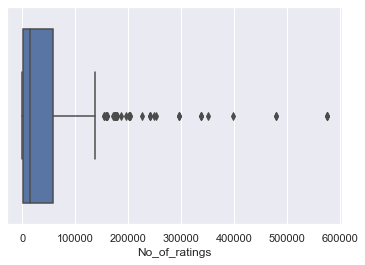

In [18]:
sns.boxplot(x=df['No_of_ratings'])

In [19]:
# Removing the outliers
df = df[df['No_of_ratings'] < 500000]

In [20]:
# Add Columns for Discounted Price
df['Discounted_Price'] = df['MRP'].values - (df['MRP'].values * (df['Discount'].values/100))

C:\Users\JOHN PAUL\AppData\Local\Temp\ipykernel_2912\2328866079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discounted_Price'] = df['MRP'].values - (df['MRP'].values * (df['Discount'].values/100))


In [21]:
# Fix the RAM data of apple products
df.loc[df.Brand == 'APPLE', ['RAM']] = 4

C:\Users\JOHN PAUL\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
df.loc[df.Brand == 'APPLE', ['RAM']] = 4

In [23]:
round(8 / 1024, 3)

0.008

 The RAM values of 4, 6, 8, 12 are in the GB while the others are in the MB. Therefore, MB must be converted to GB

In [24]:
def convert_to_mb(x):
    return round(x / 1024, 3)

df.loc[df.RAM > 12, ['RAM']] = df.loc[df.RAM > 12, ['RAM']].apply(convert_to_mb, axis=1)

C:\Users\JOHN PAUL\anaconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [25]:
df['RAM'].value_counts()


4.000     238
6.000     150
8.000     103
0.031      37
3.000      31
2.000      31
0.062       7
12.000      7
0.000       6
0.055       2
0.149       2
0.023       2
0.029       1
0.016       1
0.034       1
Name: RAM, dtype: int64

### RAM and ROM Characteristics

In [26]:
# Standard RAM and ROM size for good phone
len(df[(df['RAM'] >= 4) & (df['ROM'] >= 64)])

475

In [27]:
# Percentage of customers who preferred that specs
round(475/622*100,2)

76.37

In [28]:
len(df[(df['RAM']== 4) & (df['ROM']==128)])

54

In [29]:
len(df[(df['RAM']== 4) & (df['ROM']==64)])

145

In [30]:
len(df[(df['RAM']== 6) & (df['ROM']==128)])

127

In [31]:
len(df[(df['RAM']== 6) & (df['ROM']==64)])

23

In [32]:
len(df[(df['RAM']== 8) & (df['ROM']==128)])

92

In [33]:
df[df['ROM'] == 32] 

,Name,Brand,Ratings,No_of_ratings,No_of_reviews,MSP,MRP,Discount,RAM,ROM,Discounted_Price
11,POCO C31,POCO,4.3,120461,7343,6499,10999,40,3.000,32,6599.40
48,POCO C31,POCO,4.3,120461,7343,6499,10999,40,3.000,32,6599.40
59,NOKIA 105 SS,NOKIA,4.2,23261,1709,1299,1599,18,0.031,32,1311.18
62,REALME C30,REALME,4.3,62815,3241,5749,8499,32,2.000,32,5779.32
63,REALME C30,REALME,4.3,62815,3241,5749,8499,32,2.000,32,5779.32
...,...,...,...,...,...,...,...,...,...,...,...
566,NOKIA 105,NOKIA,4.1,30947,2708,1290,1399,7,0.000,32,1301.07
577,MICROMAX S115,MICROMAX,3.9,85,4,980,990,1,0.031,32,980.10
592,LAVA A7 2020,LAVA,3.9,1290,119,1571,1749,10,0.023,32,1574.10
604,REALME NARZO 50I,REALME,4.5,121030,4803,7499,7999,6,2.000,32,7519.06


In [34]:
# Number of cellphones tha offered discount greater than or equal to 30
np.sum(df[df['Discount'] >= 30]['Discount'].value_counts().values)

131

In [35]:
# Number of cellphones tha offered discount greater than or equal to 20
np.sum(df[df['Discount'] >= 20]['Discount'].value_counts().values)

289

In [36]:
# Number of cellphones tha offered discount greater than or equal to 10
np.sum(df[df['Discount'] >= 10]['Discount'].value_counts().values)

445

In [37]:
np.min(df[(df['RAM'] >= 4) & (df['ROM'] >= 64)]['Discounted_Price'].values)

7099.290000000001

In [38]:
np.max(df[(df['RAM'] >= 4) & (df['ROM'] >= 64)]['Discounted_Price'].values)

116117.0

In [39]:
df[(df['RAM'] >= 4) & (df['ROM'] >= 64)].groupby('Brand')['Discounted_Price'].apply(np.mean)

Brand
APPLE       66386.285714
GOOGLE      30359.310000
INFINIX     12046.388333
IQOO        26122.697500
MICROMAX    12044.270000
MOTO        17019.260000
MOTOROLA    18081.814419
NOTHING     31623.226000
OPPO        19310.778333
POCO        14877.405208
REALME      16720.423191
REDMI       12667.328065
SAMSUNG     21187.006458
TECNO       10726.421667
VIVO        17645.878788
XIAOMI      26872.493333
Name: Discounted_Price, dtype: float64

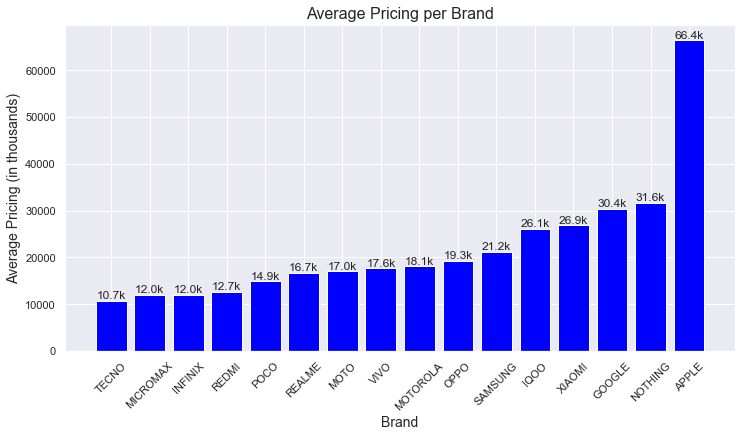

In [40]:
import matplotlib.pyplot as plt

# Data
brand = ['APPLE', 'GOOGLE', 'INFINIX', 'IQOO', 'MICROMAX', 'MOTO', 'MOTOROLA', 'NOTHING', 'OPPO', 'POCO', 'REALME', 'REDMI', 'SAMSUNG', 'TECNO', 'VIVO', 'XIAOMI']
avg_price = [66386.285714, 30359.31, 12046.388333, 26122.6975, 12044.27, 17019.26, 18081.814419, 31623.226, 19310.778333, 14877.405208, 16720.423191, 12667.328065, 21187.006458, 10726.421667, 17645.878788, 26872.493333]

# Sorting the data in ascending order
sorted_index = sorted(range(len(avg_price)), key=lambda k: avg_price[k])
brand = [brand[i] for i in sorted_index]
avg_price = [avg_price[i] for i in sorted_index]

# Converting the prices to thousands and adding labels
labels = []
for price in avg_price:
    price_in_k = price / 1000
    label = '{:.1f}k'.format(price_in_k)
    labels.append(label)

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.bar(brand, avg_price, color='blue')

# Adding labels to the bars
for i in range(len(avg_price)):
    plt.annotate(labels[i], xy=(brand[i], avg_price[i]), ha='center', va='bottom')

# Setting the title and labels
plt.title('Average Pricing per Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Average Pricing (in thousands)', fontsize=14)

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


In [41]:
12000+12700+16700

41400

In [42]:
# INFINIX 
(12000/41400) * 100

28.985507246376812

In [43]:
# REDMI 
(12700/41400) * 100

30.676328502415455

In [44]:
# REALME 
(16700/41400) * 100

40.33816425120773

# Data Preprocessing

In [45]:
df_brands_deets = df['Brand'].value_counts().rename_axis('Brands').reset_index(name='Number_of_buyers')
df_brands_deets

,Brands,Number_of_buyers
0,REALME,114
1,REDMI,72
2,INFINIX,60
3,SAMSUNG,56
4,POCO,51
5,APPLE,49
6,MOTOROLA,43
7,VIVO,39
8,OPPO,27
9,KECHAODA,17


In [46]:
# Convert to dict
ratings_mean_per_brand = df.groupby('Brand')['Ratings'].apply(np.mean).to_dict()
ratings_mean_per_brand = {k: round(v, 2) for k, v in ratings_mean_per_brand .items()}
revenue_per_brand = df.groupby('Brand')['Discounted_Price'].apply(sum).to_dict()
total_ratings_per_brand = df.groupby('Brand')['No_of_ratings'].apply(sum).to_dict()
total_reviews_per_brand = df.groupby('Brand')['No_of_reviews'].apply(sum).to_dict()
minimum_price_per_brand = df.groupby('Brand')['MRP'].apply(min).to_dict()
maximum_price_per_brand = df.groupby('Brand')['MRP'].apply(max).to_dict()
average_price_per_brand = df.groupby('Brand')['MRP'].apply(np.mean).to_dict()

def midrange(x):
    return (np.min(x)+np.max(x)) / 2

midrange_price_per_brand = df.groupby('Brand')['MRP'].apply(midrange).to_dict()

In [47]:
# Add the aveage ratings
df_brands_deets = pd.merge( df_brands_deets, pd.DataFrame(ratings_mean_per_brand.items(), columns=['Brands', 'avg_ratings']), on='Brands')
# Add the total sales based on MSP
df_brands_deets = pd.merge( df_brands_deets, pd.DataFrame(revenue_per_brand.items(), columns=['Brands', 'total_revenue']), on='Brands')
# Add the total number of ratings
df_brands_deets = pd.merge( df_brands_deets, pd.DataFrame(total_ratings_per_brand.items(), columns=['Brands', 'total_number_of_ratings']), on='Brands')
# Add the total number of reviews
df_brands_deets = pd.merge( df_brands_deets, pd.DataFrame(total_reviews_per_brand.items(), columns=['Brands', 'total_number_of_reviews']), on='Brands')
# Add the minimum price per brand
df_brands_deets = pd.merge( df_brands_deets, pd.DataFrame(minimum_price_per_brand.items(), columns=['Brands', 'min_price']), on='Brands')
# Add the maximum price per brand
df_brands_deets = pd.merge( df_brands_deets, pd.DataFrame(maximum_price_per_brand.items(), columns=['Brands', 'max_price']), on='Brands')
# Add midrange price per brand
df_brands_deets = pd.merge( df_brands_deets, pd.DataFrame(midrange_price_per_brand.items(), columns=['Brands', 'mid_price']), on='Brands')
# Add average price per brand
df_brands_deets = pd.merge( df_brands_deets, pd.DataFrame(average_price_per_brand.items(), columns=['Brands', 'average_pricing']), on='Brands')



# Cleaned Data

In [48]:
df_brands_deets

,Brands,Number_of_buyers,avg_ratings,total_revenue,total_number_of_ratings,total_number_of_reviews,min_price,max_price,mid_price,average_pricing
0,REALME,114,4.39,1718131.37,7330360,467003,7999,31999,19999.0,17752.508772
1,REDMI,72,4.23,852959.49,3286888,226216,6719,22999,14859.0,14109.000000
2,INFINIX,60,4.26,659157.62,1318224,115024,7999,49999,28999.0,15782.333333
3,SAMSUNG,56,4.24,1045864.05,2473218,194797,1689,101999,51844.0,25159.035714
4,POCO,51,4.26,735813.40,4312963,353293,9999,39999,24999.0,19979.392157
5,APPLE,49,4.59,3252928.00,5195175,321523,43900,139900,91900.0,77144.897959
6,MOTOROLA,43,4.13,777518.02,1040424,112267,10350,74999,42674.5,24565.302326
7,VIVO,39,4.34,640398.51,1093862,81153,9975,41990,25982.5,20746.948718
8,OPPO,27,4.33,494516.52,622300,51325,10974,47990,29482.0,24215.629630
9,KECHAODA,17,4.01,20879.42,230437,18091,1120,1799,1459.5,1292.705882


In [49]:
# Total revenue
df_brands_deets['total_revenue'].sum()

10909231.64

In [50]:
df_brands_deets.describe()

,Number_of_buyers,avg_ratings,total_revenue,total_number_of_ratings,total_number_of_reviews,min_price,max_price,mid_price,average_pricing
count,28.000000,28.000000,2.800000e+01,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000
mean,22.107143,4.094643,3.896154e+05,9.839245e+05,71750.785714,10099.642857,28471.321429,19285.482143,15624.584710
std,28.195533,0.254420,7.052238e+05,1.862473e+06,125806.296402,13339.306996,33682.662117,21467.162331,17870.461295
min,1.000000,3.400000,6.852600e+02,9.000000e+00,0.000000,729.000000,729.000000,729.000000,729.000000
25%,1.750000,4.000000,4.595498e+03,1.405800e+04,1396.250000,1256.500000,1724.000000,1491.750000,1445.269231
50%,10.000000,4.145000,3.248288e+04,5.341850e+04,6445.500000,4359.000000,19749.000000,12923.250000,12012.550000
75%,40.000000,4.260000,6.450883e+05,1.053784e+06,88931.500000,10506.000000,43246.750000,29609.000000,24303.047804
max,114.000000,4.590000,3.252928e+06,7.330360e+06,467003.000000,43999.000000,139900.000000,91900.000000,77144.897959


In [51]:
df_brands_deets = df_brands_deets.rename(columns={
    'Number_of_buyers': 'Buyers',
    'avg_ratings': 'Avg_Ratings',
    'total_revenue': 'Total_Sales',
    'total_number_of_ratings': 'Total_Ratings',
    'total_number_of_reviews': 'Total_Reviews'
})

In [52]:
np.mean(df.Ratings)


4.26704361873991

In [53]:
round(np.mean(df_brands_deets['Avg_Ratings'].values),2)

4.09

In [54]:
df_brands_deets[df_brands_deets['Avg_Ratings'] > 4.26]['Buyers'].sum()

235

# Data Visualization

C:\Users\JOHN PAUL\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


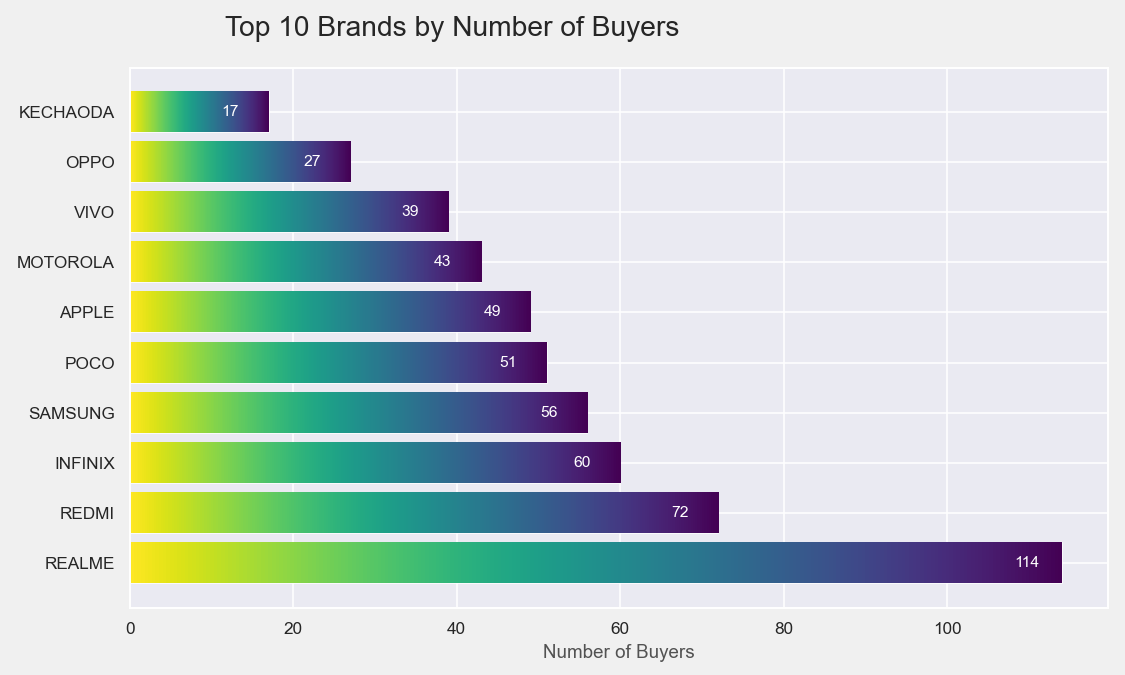

In [55]:
data = pd.DataFrame(df_brands_deets, columns=['Brands', 'Buyers'])
data_sorted = data.sort_values(by='Buyers', ascending=False)
data_sorted['Buyers'] = data_sorted['Buyers']
#pd.options.display.float_format = '{:,.0f}'.format
data_sorted.set_index('Brands', inplace=True)
ranking = data_sorted.head(10)

sns.set()
%matplotlib notebook

# Variables
index = ranking.index
values = ranking['Buyers']
plot_title = 'Top 10 Brands by Number of Buyers'
title_size = 18
subtitle = 'Source: Kaggle / Mobiles Dataset from Flipkart'
x_label = 'Number of Buyers'
filename = 'barh-plot'

# Create subplots and set a colormap
ranking.sort_values(by='Buyers', inplace=True, ascending=True)
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()
    
# Create bars
bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Set title, its font size, and position          
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

# Create Gradient Background
ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0, 1, 256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

# Create bar labels/annotation

rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white

# Set subtitle
tfrom = ax.get_xaxis_transform()

#Set x-label
ax.set_xlabel(x_label, color='#525252')

plt.savefig('buyer_bgraph.png', facecolor=(.94, .94, .94), dpi=600)


In [56]:
# average ratings

df_brands_deets.sort_values(by=['Avg_Ratings'], ascending=False).head(5)

,Brands,Buyers,Avg_Ratings,Total_Sales,Total_Ratings,Total_Reviews,min_price,max_price,mid_price,average_pricing
5,APPLE,49,4.59,3252928.00,5195175,321523,43900,139900,91900.0,77144.897959
0,REALME,114,4.39,1718131.37,7330360,467003,7999,31999,19999.0,17752.508772
7,VIVO,39,4.34,640398.51,1093862,81153,9975,41990,25982.5,20746.948718
8,OPPO,27,4.33,494516.52,622300,51325,10974,47990,29482.0,24215.629630
26,GOOGLE,1,4.30,30359.31,21210,2768,43999,43999,43999.0,43999.000000


<IPython.core.display.Javascript object>


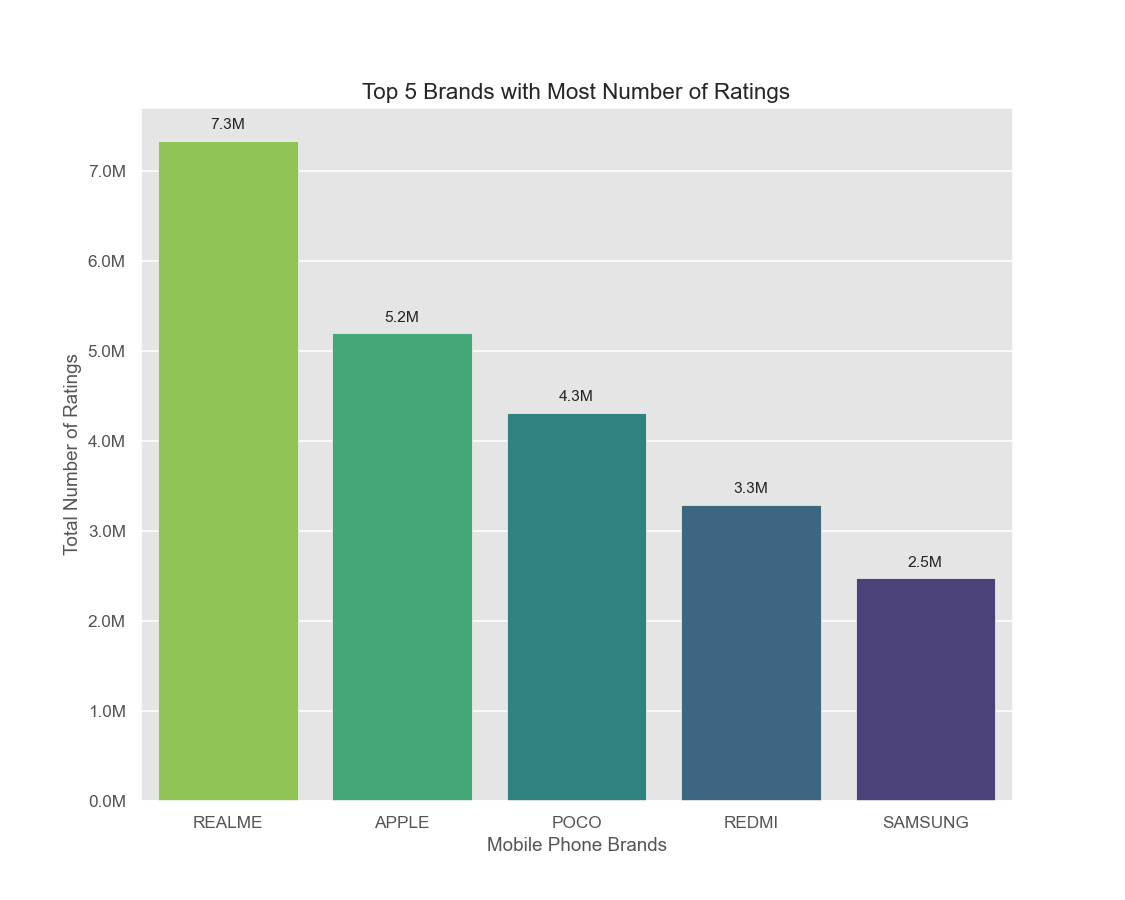

In [57]:
# Bar graph for showing the total number of ratings per brand

plt.figure(figsize=(10,8))
plt.style.use('ggplot')
ax = sns.barplot(x="Brands", y="Total_Ratings", data=df_brands_deets.sort_values(by=['Total_Ratings'], ascending=False).head(5), palette="viridis_r")
plt.xlabel("Mobile Phone Brands")
plt.ylabel("Total Number of Ratings")
plt.title("Top 5 Brands with Most Number of Ratings")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height()/1000000, 1)) + 'M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=10)

# Set y-axis tick labels to display in millions with 'M' as the unit
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1000000)))

plt.savefig('number_of_ratings_bgraph.png', facecolor=(.94, .94, .94), dpi=600)

<IPython.core.display.Javascript object>


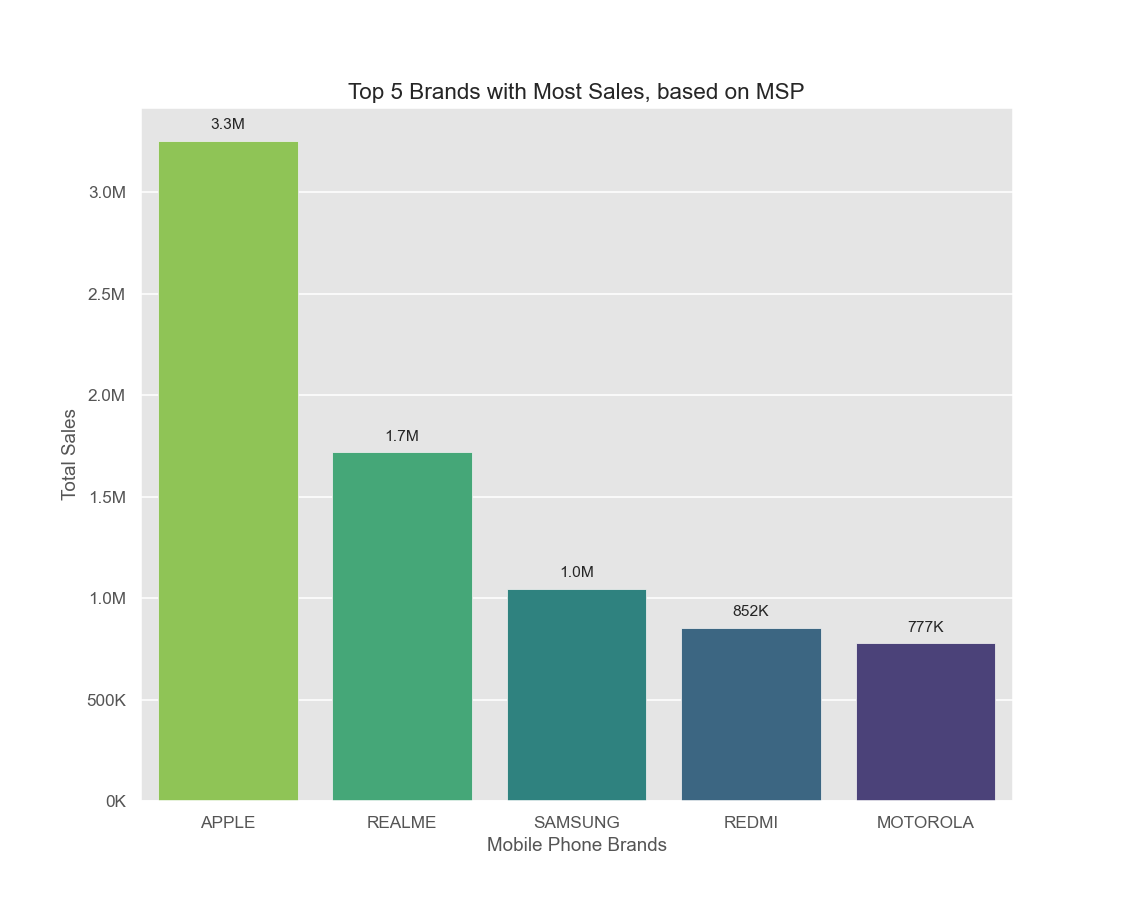

In [58]:
# Bar graph for showing the total number of ratings per brand

plt.figure(figsize=(10,8))
plt.style.use('ggplot')
ax = sns.barplot(x="Brands", y='Total_Sales', data=df_brands_deets.sort_values(by=['Total_Sales'], ascending=False).head(5), palette="viridis_r")
plt.xlabel("Mobile Phone Brands")
plt.ylabel("Total Sales")
plt.title("Top 5 Brands with Most Sales, based on MSP")

# Add value labels to the bars
for p in ax.patches:
    if p.get_height() >= 1000000:
        ax.annotate(str(round(p.get_height()/1000000, 1)) + 'M',
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points',
                    fontsize=10)
    else:
        ax.annotate(str(int(p.get_height()/1000)) + 'K',
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points',
                    fontsize=10)


# Set y-axis tick labels to display in thousands with 'K' as the unit
def format_ticks(x, pos):
    if x >= 1000000:
        return '{:.1f}M'.format(x/1000000)
    else:
        return '{:.0f}K'.format(x/1000)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.savefig('most_sales_bgraph.png', facecolor=(.94, .94, .94), dpi=600)


<IPython.core.display.Javascript object>


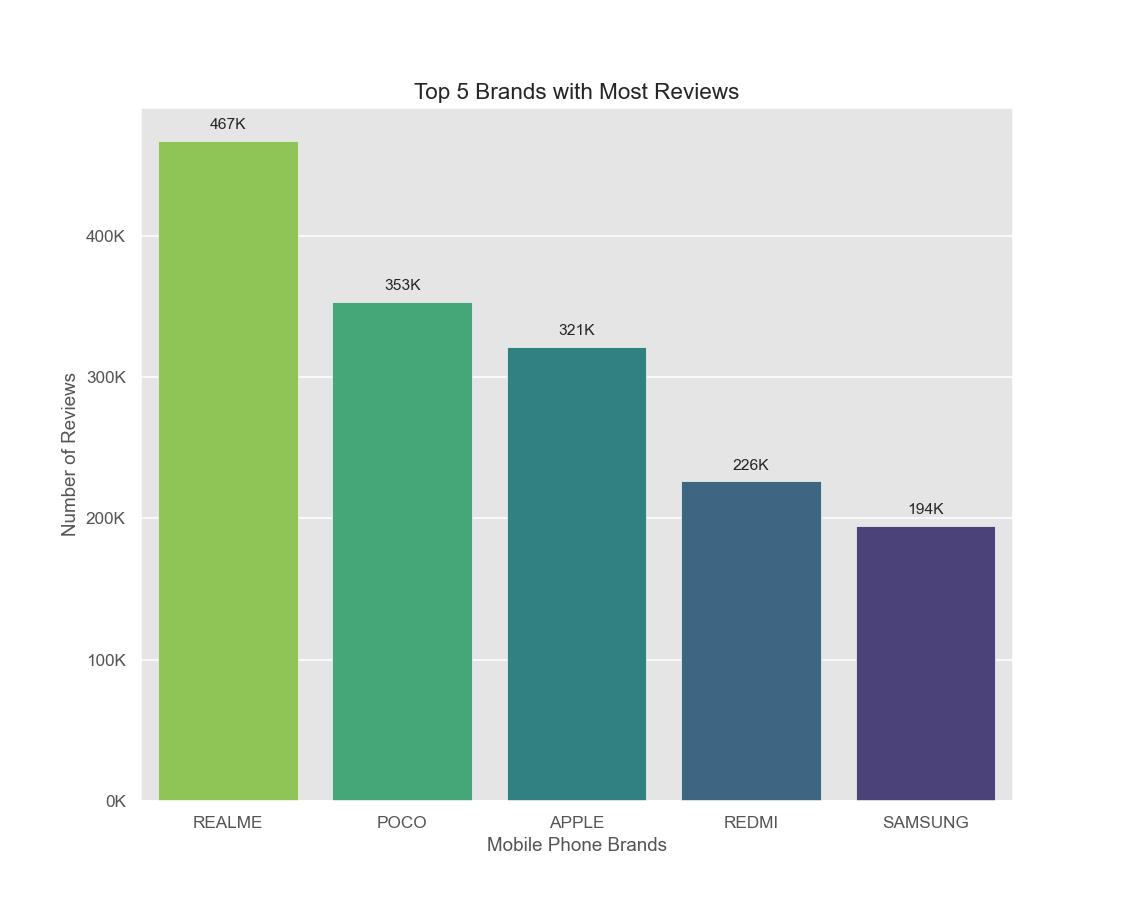

In [59]:
# Bar graph for showing the total number of reviews per brand

plt.figure(figsize=(10,8))
plt.style.use('ggplot')
ax = sns.barplot(x="Brands", y='Total_Reviews', data=df_brands_deets.sort_values(by=['Total_Reviews'], ascending=False).head(5), palette="viridis_r")
plt.xlabel("Mobile Phone Brands")
plt.ylabel("Number of Reviews")
plt.title("Top 5 Brands with Most Reviews")

# Add value labels to the bars
for p in ax.patches:
    if p.get_height() >= 1000000:
        ax.annotate(str(round(p.get_height()/1000000, 1)) + 'M',
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points',
                    fontsize=10)
    else:
        ax.annotate(str(int(p.get_height()/1000)) + 'K',
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points',
                    fontsize=10)


# Set y-axis tick labels to display in thousands with 'K' as the unit
def format_ticks(x, pos):
    if x >= 1000000:
        return '{:.1f}M'.format(x/1000000)
    else:
        return '{:.0f}K'.format(x/1000)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.savefig('most_reviews.png', facecolor=(.94, .94, .94), dpi=600)


# Correlation Analysis

<IPython.core.display.Javascript object>


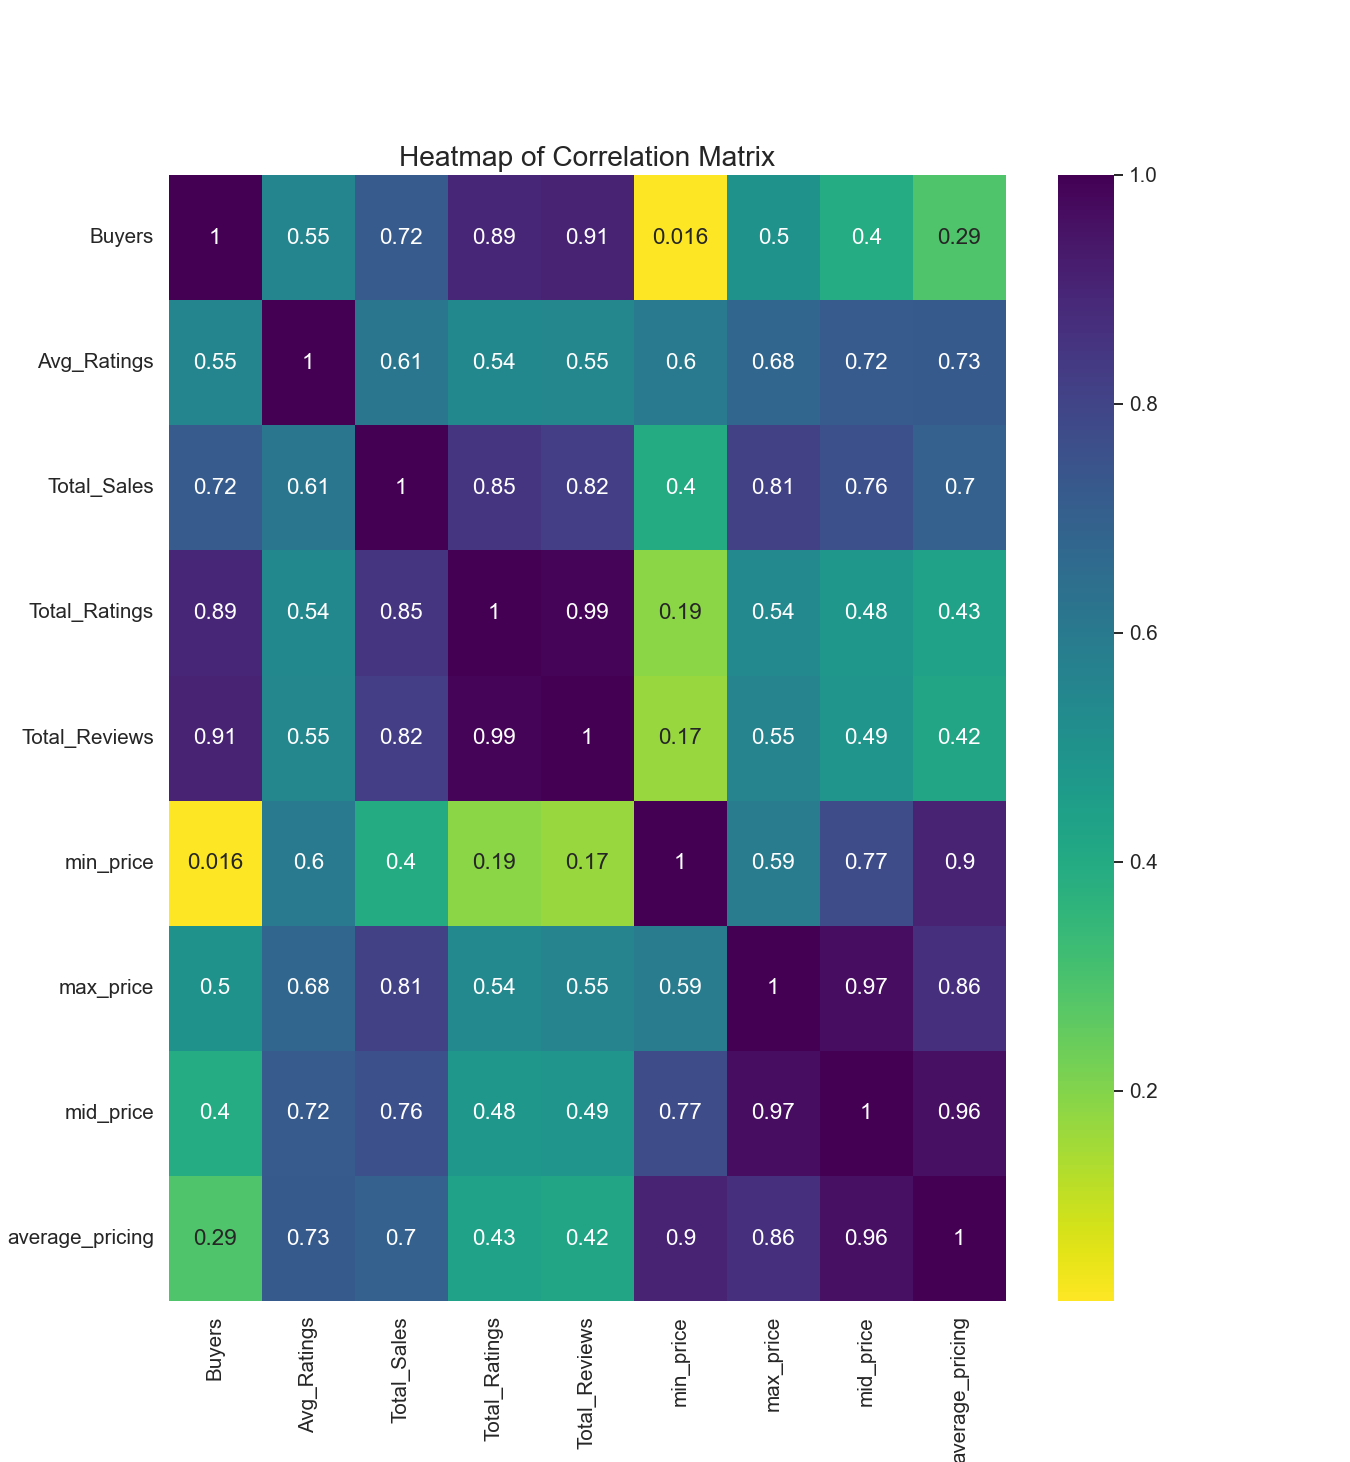

In [60]:
# Create correlation matrix
corr_matrix = df_brands_deets.corr()

# Set up heatmap
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 13))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="viridis_r")

# Set heatmap title
ax.set_title('Heatmap of Correlation Matrix', fontsize=18)

# Show the plot
plt.savefig('corrmap.png', facecolor=(.94, .94, .94), dpi=300)



<IPython.core.display.Javascript object>


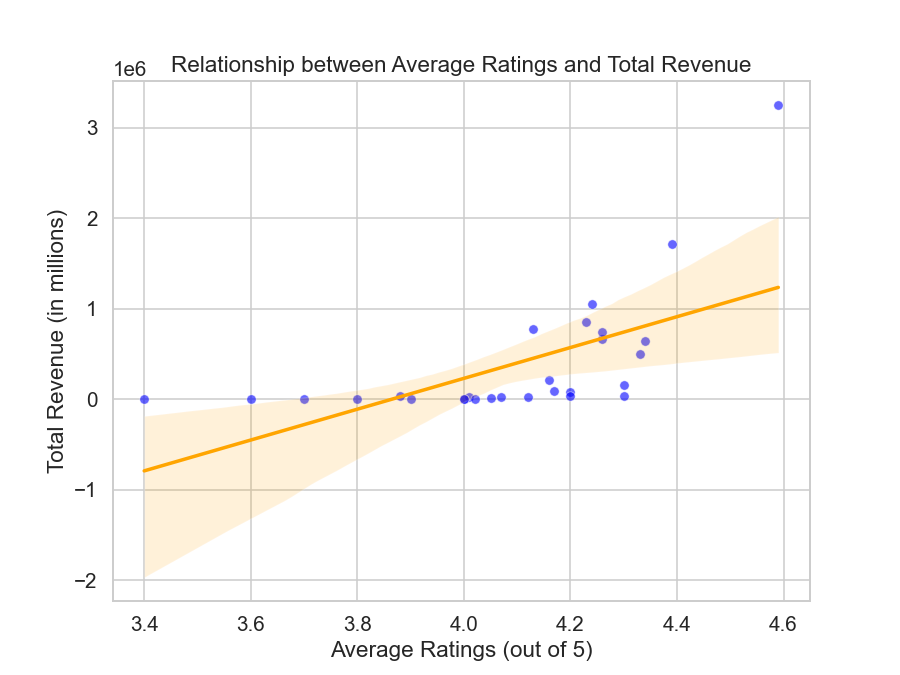

In [61]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Avg_Ratings", y="Total_Sales", data=df_brands_deets, color='blue', alpha=0.6)
sns.regplot(x="Avg_Ratings", y="Total_Sales", data=df_brands_deets, scatter=False, color="orange")
plt.xlabel("Average Ratings (out of 5)")
plt.ylabel("Total Revenue (in millions)")
plt.title("Relationship between Average Ratings and Total Revenue")
plt.savefig('averatings_sales.png', facecolor=(.94, .94, .94), dpi=600)



<IPython.core.display.Javascript object>


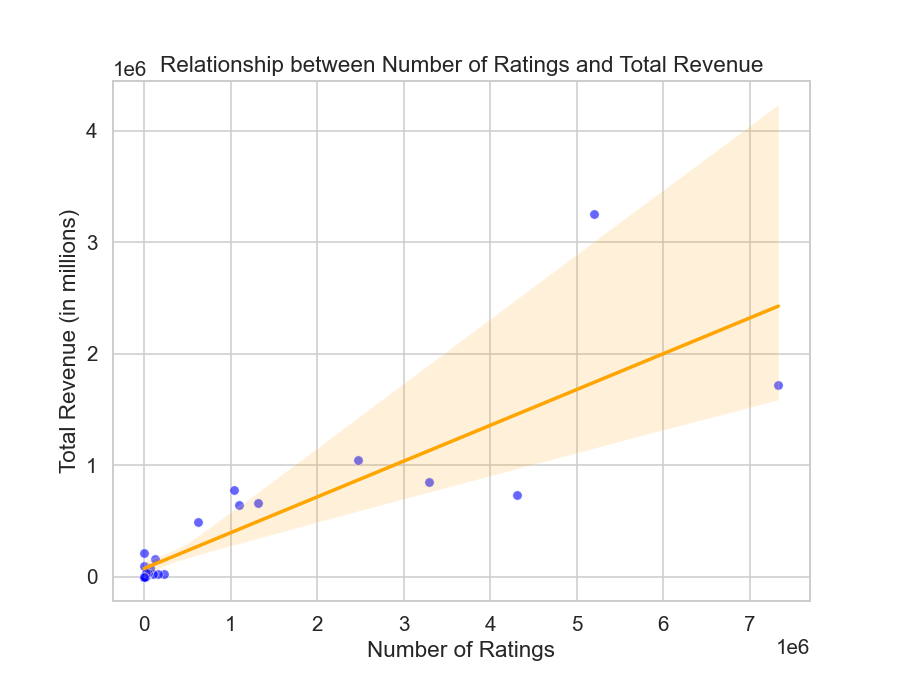

In [62]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Total_Ratings", y="Total_Sales", data=df_brands_deets, color='blue', alpha=0.6)
sns.regplot(x="Total_Ratings", y="Total_Sales", data=df_brands_deets, scatter=False, color="orange")
plt.xlabel("Number of Ratings")
plt.ylabel("Total Revenue (in millions)")
plt.title("Relationship between Number of Ratings and Total Revenue")
plt.savefig('averatings_sales.png', facecolor=(.94, .94, .94), dpi=600)



<IPython.core.display.Javascript object>


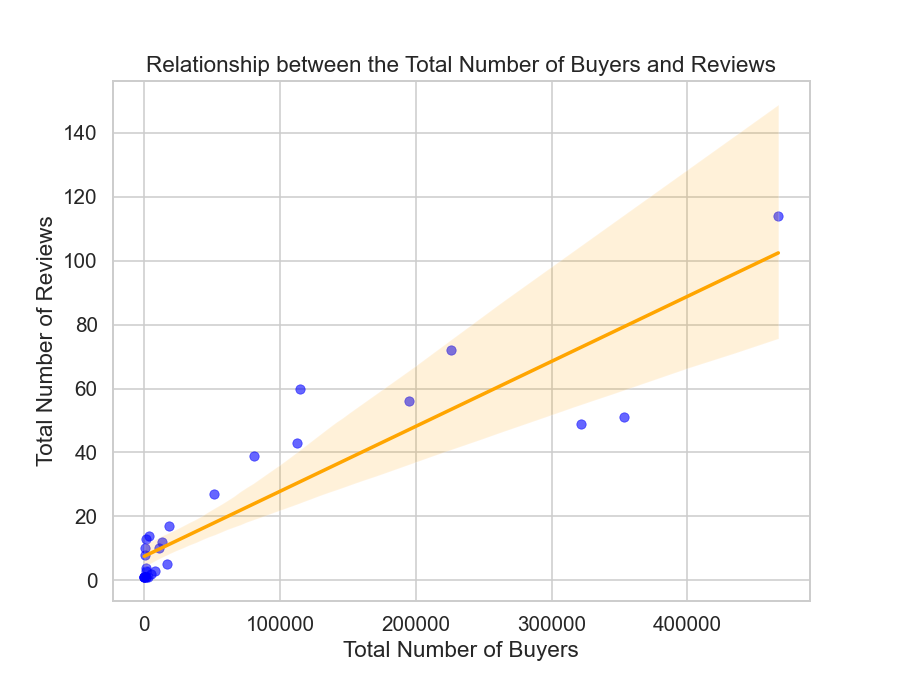

In [63]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Total_Reviews", y="Buyers", data=df_brands_deets, color='blue', alpha=0.6, edgecolor=None)
sns.regplot(x="Total_Reviews", y="Buyers", data=df_brands_deets, scatter=False, color="orange")
plt.xlabel("Total Number of Buyers")
plt.ylabel("Total Number of Reviews")
plt.title("Relationship between the Total Number of Buyers and Reviews")
plt.savefig('buyers_vs_reviews.png', facecolor=(.94, .94, .94), dpi=600)

<IPython.core.display.Javascript object>


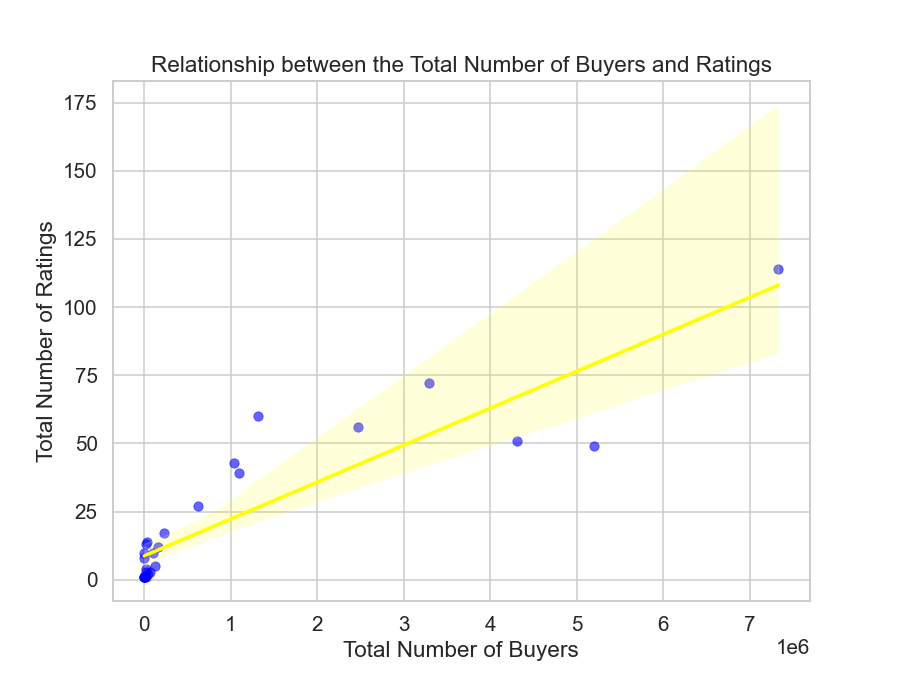

In [64]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Total_Ratings", y="Buyers", data=df_brands_deets, color='blue', alpha=0.6, edgecolor=None)
sns.regplot(x="Total_Ratings", y="Buyers", data=df_brands_deets, scatter=False, color="yellow")
plt.xlabel("Total Number of Buyers")
plt.ylabel("Total Number of Ratings")
plt.title("Relationship between the Total Number of Buyers and Ratings")
plt.savefig('buyers_vs_ratings.png', facecolor=(.94, .94, .94), dpi=600)
